<H1>Dataset Loading and Interaction Extraction</h1>

In [33]:
class Sentence:
    def __init__(self):
        self.text = ""
        self.proteins = []
        self.interactions = []
        self.reconstructedText = ""
        self.words = []
        self.valid = False

    def show(self):
        print(self.text)
        print(self.proteins)
        if len(self.interactions):
            for i in self.interactions:
                print(i)
        print()
        
        
    def processText(self):
        #self.text = self.text.replace("_/_","_ _")
        #self.text = self.text.replace("_:_","_ _")
        #self.text = self.text.replace("_-_","_ _")
        self.text = re.sub("(\_[^_]_)", "_ _", self.text)#regexp to remove things like _:_
        self.text = self.text.replace("(_","_")
        self.text = self.text.replace("_)","_")
    
    def checkValidity(self):
        count = 0
        for w in range(len(self.words)):
            if "__" in self.words[w]:
                count = count +1
        
        if count == len(self.proteins):
            self.valid = True
            #print(self.valid)
        
    
    def reconstructText(self):
        self.words = self.text.split(" ")
        self.checkValidity()
        #print(self.words)
        if self.valid:
            p=0
            for w in range(len(self.words)):
                if "__" in self.words[w]:
                    self.words[w] = self.proteins[p]
                    #self.words[w] = "PROTEIN"+str(p)
                    p=p+1
            #print(self.words)
            #print()
        
    def reassembleSentence(self):
        print(" ".join(self.words))
        
    def fullProcess(self):
        self.processText()
        self.reconstructText()
        

In [34]:
import pickle

with open('datasetTrain.pkl', 'rb') as input1:
    trainSetRaw = pickle.load(input1)
    
with open('datasetTest.pkl', 'rb') as input2:    
    testSetRaw = pickle.load(input2)
    
try:
    print(len(trainSetRaw))
    print(len(testSetRaw))
except NameError:
    print("nope")   

2245
529


In [35]:
def findMaxWords(inputList):
    maxwords = -1 
    for i in inputList:
        if len(i.words)>maxwords:
            maxwords = len(i.words)
    print(maxwords)
    

In [36]:
findMaxWords(trainSetRaw)
findMaxWords(testSetRaw)

93
74


<h1>Maximum Words In Sentence</h1>

We start out with
2245 training examples
529 test examples

mean 24.980894015861573
std 10.856406734698178
80 words: 2770
70 words: 2766
60 words: 2751
50 words: 2697
48 words: 2674
40 words: 2544
30 words: 2086

Selecting for under 48 words we are left with
2186 training examples
511 test examples


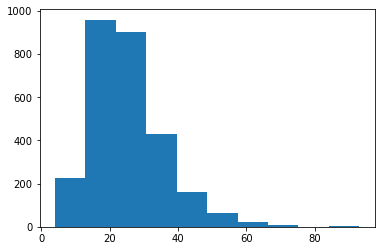

In [37]:
print("We start out with")

print(len(trainSetRaw),"training examples")
print(len(testSetRaw),"test examples")

print()

allSet = [len(x.words) for x in trainSetRaw+testSetRaw]

from matplotlib import pyplot as plt 
import numpy as np  

print("mean",np.mean(allSet))

print("std",np.std(allSet))

plt.hist(allSet)



selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=80 ]

print("80 words:",len(selectedSet))


selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=70 ]

print("70 words:",len(selectedSet))

selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=60 ]

print("60 words:",len(selectedSet))


selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=50 ]

print("50 words:",len(selectedSet))

selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=48 ]

print("48 words:",len(selectedSet))


selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=40 ]

print("40 words:",len(selectedSet))

selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=30 ]

print("30 words:",len(selectedSet))


#HERE
maxSentenceWords = 50

trainSetRaw = [x for x in trainSetRaw if len(x.words)<=maxSentenceWords]
testSetRaw = [x for x in testSetRaw if len(x.words)<=maxSentenceWords]


print()
print("Selecting for under 48 words we are left with")
print(len(trainSetRaw),"training examples")
print(len(testSetRaw),"test examples")

In [38]:
print(trainSetRaw[0])
print()

print(trainSetRaw[0].text)
print()

print(trainSetRaw[0].words)
print()

print(trainSetRaw[0].proteins)



print(len('protein0'))


Cytokines measurements during _________ treatment showed a trend to decreasing levels of ____ at 4, 12, and 24 weeks.

['Cytokines', 'measurements', 'during', 'PROTEIN0', 'treatment', 'showed', 'a', 'trend', 'to', 'decreasing', 'levels', 'of', 'PROTEIN1', 'at', '4,', '12,', 'and', '24', 'weeks.']

['PROTEIN0', 'PROTEIN1']
8


In [39]:
import string
string.ascii_letters

import random
random.choice(string.ascii_letters)

def genRandomWord():
    word = ''
    for letter in range(random.randint(3,9)):
        word+=random.choice(string.ascii_letters)
        
    return word
        

for i,v in enumerate(range(10)):
    print(i,genRandomWord())

0 qqVQLCEm
1 dvVCpWLm
2 HryITZnup
3 tEnzwsz
4 VyH
5 QLhneQxoH
6 POsNTnrat
7 gSojA
8 uwrnKwWd
9 Ubhti


In [40]:
import re

re.sub('PROTEIN[0-9]',genRandomWord(),'PROTEINA PROTEIN1 PROTEIN2 is a sentence')




'PROTEINA pgHlXffuU pgHlXffuU is a sentence'

In [41]:
proteins = ["Actin","Albumins","Alpha globulin","Arp2/3","Beta globulin","C-myc","C-reactive protein","C1-inhibitor","C3-convertase","CFTR","Cadherin","Calcium channels","Carboxypeptidase","Collagen","Coronin","Dystrphin","Elastin","Ependymin","Estrogen receptor","F-spondin","FOXP2","FOXP3","Factor VIII","Factor XIII","Ferritin","Fibrin","Fibronectin","Gamma globulin","Glucose transporter","Glycophorin D","GroEL ","Hemoglobin","Histones","Hydrolases","IgA","IgD","IgE","IgG","IgM","Insulin","Integrin","Keratin","Muscarinic acetylcholine receptor","MyoD","Myoglobin","Myosin","NCAM","Nebulin","Nicotinic acetylcholine receptor","Oxidoreductases","Oxytocin","P53","Pikachurin","Potassium channels","Protein C","Protein S","Protein Z","Protein Z-related protease inhibitor","Rhodopsin","Scramblase","Selectin","Serum Amyloid P Component","Serum albumin","Sodium channels","Spectrin","Tau","Thrombin","Titin","Transferases","Tropomyosin","Tubulin","Von Willebrand Factor"]

import random

def genRandomProtein():
    return random.choice(proteins)
        

for i,v in enumerate(range(10)):
    print(i,genRandomProtein())

0 IgG
1 Myoglobin
2 C1-inhibitor
3 Tropomyosin
4 IgM
5 Thrombin
6 Collagen
7 Protein S
8 C-myc
9 Serum albumin


In [42]:
for i in range(10):
    print('PROTEIN'+str(i))

PROTEIN0
PROTEIN1
PROTEIN2
PROTEIN3
PROTEIN4
PROTEIN5
PROTEIN6
PROTEIN7
PROTEIN8
PROTEIN9


In [43]:
trainSet = []
trainLabel = []

for example in trainSetRaw:
    #print(example.words)
    for interaction in example.interactions:
        sentence =" ".join(example.words)
        
        #print(sentence)
        #print()
        
        if interaction[2] == "True":
            trainLabel = trainLabel + [1]
            #print("HIT")
        else:
            trainLabel = trainLabel + [0]
            #print("MISS")
        
        sentence = sentence.replace(interaction[0],'PROTEINA')
        sentence = sentence.replace(interaction[1],'PROTEINB')
        for i in range(10):
            sentence = sentence.replace('PROTEIN'+str(i),genRandomProtein())
        #sentence = re.sub('PROTEIN[0-9]',genRandomWord(),sentence)
        
        #print(sentence)
        #print()
        #print()
        
        trainSet = trainSet + [sentence]    
            
    #print()
    
    
print(len(trainSet))
print(len(trainLabel))

10394
10394


In [44]:
testSet = []
testLabel = []

for example in testSetRaw:
    #print(example.words)
    for interaction in example.interactions:
        sentence =" ".join(example.words)
        
        #print(sentence)
        #print()
        
        if interaction[2] == "True":
            testLabel = testLabel + [1]
            #print("HIT")
        else:
            testLabel = testLabel + [0]
            #print("MISS")
        
        sentence = sentence.replace(interaction[0],'PROTEINA')
        sentence = sentence.replace(interaction[1],'PROTEINB')
        sentence = re.sub('PROTEIN[0-9]',genRandomWord(),sentence)
        
        #print(sentence)
        #print()
        #print()
        
        testSet = testSet + [sentence]    
            
    #print()
    
    
print(len(testSet))
print(len(testLabel))

2336
2336


In [45]:
for t in trainSet:
    print(t)
    print()

Cytokines measurements during PROTEINA treatment showed a trend to decreasing levels of PROTEINB at 4, 12, and 24 weeks.

Levels of PROTEINA were slightly increased following PROTEINB treatment (P = 0.09).

This study describes the distributions of PROTEINA as well as mRNAs for PROTEINB Pikachurin collagen types II Factor XIII and III Sodium channels in a growing "cartilage cap" of osteochondroma.

This study describes the distributions of PROTEINA as well as mRNAs for Scramblase PROTEINB collagen types II Rhodopsin and III Protein S in a growing "cartilage cap" of osteochondroma.

This study describes the distributions of PROTEINA as well as mRNAs for Rhodopsin F-spondin collagen types II PROTEINB and III Nicotinic acetylcholine receptor in a growing "cartilage cap" of osteochondroma.

This study describes the distributions of PROTEINA as well as mRNAs for Oxidoreductases GroEL  collagen types II Arp2/3 and III PROTEINB in a growing "cartilage cap" of osteochondroma.

This study descr

The binding of Fibronectin and PROTEINA requires distinct domains of PROTEINB

As observed with the homologous Drosophila proteins, PROTEINA interacts directly with PROTEINB however, additional interactions between IgA and Protein Z-related protease inhibitor or Arp2/3 were detected.

As observed with the homologous Drosophila proteins, PROTEINA interacts directly with Nicotinic acetylcholine receptor however, additional interactions between PROTEINB and Keratin or IgD were detected.

As observed with the homologous Drosophila proteins, PROTEINA interacts directly with Carboxypeptidase however, additional interactions between Myosin and PROTEINB or NCAM were detected.

As observed with the homologous Drosophila proteins, PROTEINA interacts directly with Oxytocin however, additional interactions between IgD and Coronin or PROTEINB were detected.

As observed with the homologous Drosophila proteins, Oxytocin interacts directly with PROTEINA however, additional interactions between PROTEI

We have previously identified a nuclear protein of M(r)265K, PROTEINA that binds specifically to the Protein C form of PROTEINB

We have previously identified a nuclear protein of M(r)265K, Pikachurin that binds specifically to the PROTEINA form of PROTEINB

We have used fluorescence anisotropy measurements to define the equilibrium binding parameters of the PROTEINA PROTEINB interaction and report here that Transferases can activate transcription through a region in its carboxy terminus.

We have used fluorescence anisotropy measurements to define the equilibrium binding parameters of the PROTEINA Serum albumin interaction and report here that PROTEINB can activate transcription through a region in its carboxy terminus.

We have used fluorescence anisotropy measurements to define the equilibrium binding parameters of the Ependymin PROTEINA interaction and report here that PROTEINB can activate transcription through a region in its carboxy terminus.

The activation domain of PROTEINA i

The predicted amino acid sequence of Tau is 60% identical and 73% similar to mouse IgG Protein Z Titin expressed in an Spectrin mouse pro-B cell line (Ba/F3) binds PROTEINA with high affinity (200 to 250 pM), and the transfected cells exhibit a proliferative response to PROTEINB

Mouse PROTEINA does not bind to PROTEINB and Beta globulin Ba/F3 cells do not respond to the mouse cytokine, observations consistent with the known species specificity of Scramblase

Mouse PROTEINA does not bind to Integrin and PROTEINB Ba/F3 cells do not respond to the mouse cytokine, observations consistent with the known species specificity of C3-convertase

Mouse PROTEINA does not bind to Nicotinic acetylcholine receptor and Protein Z-related protease inhibitor Ba/F3 cells do not respond to the mouse cytokine, observations consistent with the known species specificity of PROTEINB

Mouse Arp2/3 does not bind to PROTEINA and PROTEINB Ba/F3 cells do not respond to the mouse cytokine, observations consistent w


Here we show that a complex of Thrombin the exterior envelope glycoprotein, of macrophage-tropic primary HIV-1 and soluble C-reactive protein interacts specifically with Protein Z-related protease inhibitor and inhibits the binding of the natural PROTEINA ligands, PROTEINB and Nebulin (refs 7, 8).

Here we show that a complex of FOXP3 the exterior envelope glycoprotein, of macrophage-tropic primary HIV-1 and soluble Myosin interacts specifically with Myosin and inhibits the binding of the natural PROTEINA ligands, Actin and PROTEINB (refs 7, 8).

Here we show that a complex of NCAM the exterior envelope glycoprotein, of macrophage-tropic primary HIV-1 and soluble IgE interacts specifically with Nicotinic acetylcholine receptor and inhibits the binding of the natural FOXP3 ligands, PROTEINA and PROTEINB (refs 7, 8).

The apparent affinity of the interaction between PROTEINA and PROTEINB was dramatically lower in the absence of soluble C-reactive protein

The apparent affinity of the in

An PROTEINA complex containing mainly Cadherin and PROTEINB Tau Tau complex) appears when DNA synthesis arrests, replacing the Scramblase Scramblase containing GroEL  complex of proliferating myoblasts Actin complex).

An PROTEINA complex containing mainly IgE and Tropomyosin PROTEINB Scramblase complex) appears when DNA synthesis arrests, replacing the IgA Glucose transporter containing Albumins complex of proliferating myoblasts Oxidoreductases complex).

An PROTEINA complex containing mainly FOXP2 and Glucose transporter Potassium channels PROTEINB complex) appears when DNA synthesis arrests, replacing the Alpha globulin Keratin containing C3-convertase complex of proliferating myoblasts Histones complex).

An PROTEINA complex containing mainly Serum albumin and Protein Z-related protease inhibitor Insulin NCAM complex) appears when DNA synthesis arrests, replacing the PROTEINB Factor XIII containing GroEL  complex of proliferating myoblasts Actin complex).

An PROTEINA complex cont


In contrast, physical interaction is not necessary for Cadherin to repress PROTEINA and PROTEINB transcription.

Proto-oncoprotein PROTEINA interacts with PROTEINB in activated thymocytes and peripheral T cells.

The molecular adapter PROTEINA is rapidly tyrosine phosphorylated following stimulation through the PROTEINB and associates with P53 homology domain-2 (SH2)/SH3 domain-containing adapters such as Actin Serum albumin and Protein Z which interact with guanine nucleotide exchange factors specific for the Ras family.

The molecular adapter PROTEINA is rapidly tyrosine phosphorylated following stimulation through the Histones and associates with PROTEINB homology domain-2 (SH2)/SH3 domain-containing adapters such as Gamma globulin Myoglobin and Fibronectin which interact with guanine nucleotide exchange factors specific for the Ras family.

The molecular adapter PROTEINA is rapidly tyrosine phosphorylated following stimulation through the C-myc and associates with Ferritin homolog

A null mutation of the Protein Z gene PROTEINA is lethal, but null mutations in the Fibronectin Hydrolases Collagen PROTEINB IgM Sodium channels and Tropomyosin Insulin and Protein Z genes have relatively mild or no effects.

A null mutation of the Fibrin gene PROTEINA is lethal, but null mutations in the Myosin Protein C Histones FOXP3 PROTEINB Pikachurin and CFTR C-reactive protein and Fibrin genes have relatively mild or no effects.

A null mutation of the Cadherin gene PROTEINA is lethal, but null mutations in the Ferritin Glycophorin D Fibronectin Myosin Cadherin PROTEINB and Arp2/3 Alpha globulin and Cadherin genes have relatively mild or no effects.

A null mutation of the Glucose transporter gene PROTEINA is lethal, but null mutations in the Glucose transporter Arp2/3 Insulin Dystrphin Von Willebrand Factor Actin and PROTEINB NCAM and Glucose transporter genes have relatively mild or no effects.

A null mutation of the Calcium channels gene PROTEINA is lethal, but null mutation

By two-hybrid screening we have identified two partners that directly associate with PROTEINA Factor XIII a previously characterized Thrombin subunit, and a novel protein of 33 kDa Ferritin which is part of the PROTEINB complex and has an RNA binding domain.

By two-hybrid screening we have identified two partners that directly associate with Fibrin PROTEINA a previously characterized PROTEINB subunit, and a novel protein of 33 kDa Actin which is part of the Rhodopsin complex and has an RNA binding domain.

By two-hybrid screening we have identified two partners that directly associate with Transferases PROTEINA a previously characterized Ferritin subunit, and a novel protein of 33 kDa PROTEINB which is part of the Calcium channels complex and has an RNA binding domain.

By two-hybrid screening we have identified two partners that directly associate with C3-convertase PROTEINA a previously characterized Elastin subunit, and a novel protein of 33 kDa Sodium channels which is part of the


Chick embryo fibroblasts contain about 75-100 microM unpolymerized PROTEINA and at least four proteins which can bind Glucose transporter monomers, Muscarinic acetylcholine receptor Thrombin IgE Coronin and MyoD PROTEINB

Chick embryo fibroblasts contain about 75-100 microM unpolymerized Nebulin and at least four proteins which can bind PROTEINA monomers, PROTEINB Nebulin FOXP2 C-reactive protein and Protein Z Fibrin

Chick embryo fibroblasts contain about 75-100 microM unpolymerized Glycophorin D and at least four proteins which can bind PROTEINA monomers, Factor VIII PROTEINB Spectrin Glucose transporter and Sodium channels Factor XIII

Chick embryo fibroblasts contain about 75-100 microM unpolymerized NCAM and at least four proteins which can bind PROTEINA monomers, Carboxypeptidase Protein Z PROTEINB Protein Z and Nicotinic acetylcholine receptor Ferritin

Chick embryo fibroblasts contain about 75-100 microM unpolymerized Histones and at least four proteins which can bind PROTEINA

However, although expression of Beta globulin alone will not induce G1 FOXP2 activity or S phase, coexpression of FOXP3 with Calcium channels allows the generation of C-reactive protein activity and the induction of S phase, coincident with the loss of the Rhodopsin PROTEINA PROTEINB

However, a number of mammalian DNA repair proteins lack NLS clusters; these proteins include PROTEINA PROTEINB FOXP3 mouse CFTR and the Protein Z Gamma globulin and Hydrolases subunits of C-reactive protein

However, a number of mammalian DNA repair proteins lack NLS clusters; these proteins include PROTEINA Elastin PROTEINB mouse Factor VIII and the Von Willebrand Factor Myoglobin and C1-inhibitor subunits of MyoD

However, a number of mammalian DNA repair proteins lack NLS clusters; these proteins include PROTEINA Elastin Integrin mouse PROTEINB and the Myosin Factor VIII and Insulin subunits of Nicotinic acetylcholine receptor

However, a number of mammalian DNA repair proteins lack NLS clusters; these

Immunoreactive Coronin Fibronectin PROTEINA and PROTEINB proteins in hepatocellular carcinoma: relationships with tumor grade, clinicopathologic parameters, and patients' survival.

Immunoreactivity for PROTEINA PROTEINB Hemoglobin Albumins and Hemoglobin was observed in all 15 specimens.

Immunoreactivity for PROTEINA Alpha globulin PROTEINB IgD and Glucose transporter was observed in all 15 specimens.

Immunoreactivity for PROTEINA Tubulin Histones PROTEINB and Coronin was observed in all 15 specimens.

Immunoreactivity for PROTEINA IgM Collagen Oxidoreductases and PROTEINB was observed in all 15 specimens.

Immunoreactivity for Serum albumin PROTEINA PROTEINB Histones and Serum Amyloid P Component was observed in all 15 specimens.

Immunoreactivity for Pikachurin PROTEINA Tubulin PROTEINB and Oxidoreductases was observed in all 15 specimens.

Immunoreactivity for Spectrin PROTEINA Von Willebrand Factor Dystrphin and PROTEINB was observed in all 15 specimens.

Immunoreactivity for FO


To determine the effect of PROTEINA PROTEINB on cardiac contractile protein synthesis in vivo, we measured L-[ring-2, 6-3H]phenylalanine incorporation into Selectin and FOXP3 during intravenous infusions (4 h) of either saline or FOXP3 (1 microgram. kg-1. min-1) in awake rats.

To determine the effect of PROTEINA Potassium channels on cardiac contractile protein synthesis in vivo, we measured L-[ring-2, 6-3H]phenylalanine incorporation into PROTEINB and Oxidoreductases during intravenous infusions (4 h) of either saline or C-reactive protein (1 microgram. kg-1. min-1) in awake rats.

To determine the effect of PROTEINA Calcium channels on cardiac contractile protein synthesis in vivo, we measured L-[ring-2, 6-3H]phenylalanine incorporation into Histones and PROTEINB during intravenous infusions (4 h) of either saline or IgE (1 microgram. kg-1. min-1) in awake rats.

To determine the effect of PROTEINA Estrogen receptor on cardiac contractile protein synthesis in vivo, we measured L-[r


METHODS: We have performed a detailed study of the pattern of expression of PROTEINA Protein C Glycophorin D Myosin Dystrphin PROTEINB isoforms, Serum albumin FOXP3 Hemoglobin and Oxidoreductases PROTEINA in the ventricular conduction system of normal and congenitally malformed mouse hearts (iv background) from embryonic day 14.5 to 19.5.

METHODS: We have performed a detailed study of the pattern of expression of PROTEINA Titin Tubulin Ependymin Dystrphin Ferritin isoforms, PROTEINB Calcium channels C1-inhibitor and Protein C PROTEINA in the ventricular conduction system of normal and congenitally malformed mouse hearts (iv background) from embryonic day 14.5 to 19.5.

METHODS: We have performed a detailed study of the pattern of expression of PROTEINA Scramblase CFTR Hemoglobin P53 Cadherin isoforms, Factor VIII PROTEINB Calcium channels and Scramblase PROTEINA in the ventricular conduction system of normal and congenitally malformed mouse hearts (iv background) from embryonic day 1

Other mammalian Cadherin such as Estrogen receptor and Nebulin but also Spectrin from Physarum polycephalum are similar targets for PIP2-stimulated PROTEINA PROTEINB phosphorylation.

PROTEINA cell injury exhibited proteolysis of the PROTEINB protein substrate Muscarinic acetylcholine receptor without appreciable breakdown of Keratin

PROTEINA cell injury exhibited proteolysis of the F-spondin protein substrate PROTEINB without appreciable breakdown of Von Willebrand Factor

PROTEINA cell injury exhibited proteolysis of the Collagen protein substrate Nebulin without appreciable breakdown of PROTEINB

Factor XIII cell injury exhibited proteolysis of the PROTEINA protein substrate PROTEINB without appreciable breakdown of Tubulin

Histones cell injury exhibited proteolysis of the PROTEINA protein substrate IgD without appreciable breakdown of PROTEINB

IgM cell injury exhibited proteolysis of the C1-inhibitor protein substrate PROTEINA without appreciable breakdown of PROTEINB

Other tha


The herpes simplex virus Dystrphin complex, a heterotrimer of the Fibrin PROTEINA and PROTEINB proteins, displays a single predominant site of primer synthesis on phi X174 virion DNA (Tenney, D. J., Hurlburt, W. W., Micheletti, P. M., Bifano, M., and Hamatake, R. K. (1994) J. Biol. Chem. 269, 5030-5035).

The herpes simplex virus type-1 PROTEINA is a heterotrimer encoded by the PROTEINB NCAM and Transferases genes.

The herpes simplex virus type-1 PROTEINA is a heterotrimer encoded by the Tropomyosin PROTEINB and IgM genes.

The herpes simplex virus type-1 PROTEINA is a heterotrimer encoded by the Von Willebrand Factor Alpha globulin and PROTEINB genes.

The herpes simplex virus type-1 Oxidoreductases is a heterotrimer encoded by the PROTEINA PROTEINB and Actin genes.

The herpes simplex virus type-1 Serum albumin is a heterotrimer encoded by the PROTEINA Von Willebrand Factor and PROTEINB genes.

The herpes simplex virus type-1 Muscarinic acetylcholine receptor is a heterotrimer enco


The neoplastic cells were positive for Selectin Estrogen receptor Coronin and PROTEINA but negative for Hydrolases Muscarinic acetylcholine receptor PROTEINB Gamma globulin Myoglobin Protein C and Selectin protein.

The neoplastic cells were positive for Cadherin Cadherin Nicotinic acetylcholine receptor and PROTEINA but negative for Protein Z Glycophorin D Dystrphin PROTEINB Histones Beta globulin and Cadherin protein.

The neoplastic cells were positive for FOXP3 Oxidoreductases GroEL  and PROTEINA but negative for Keratin IgA GroEL  P53 PROTEINB Carboxypeptidase and FOXP3 protein.

The neoplastic cells were positive for C1-inhibitor Selectin Serum albumin and PROTEINA but negative for GroEL  Oxytocin FOXP2 Pikachurin Tropomyosin PROTEINB and C1-inhibitor protein.

The neoplastic cells were positive for PROTEINB Fibronectin Oxidoreductases and PROTEINA but negative for FOXP2 Factor XIII Protein C MyoD Tropomyosin C-reactive protein and PROTEINB protein.

The neoplastic cells were po

The PROTEINA PROTEINB and the Actin receptor recruit complexes formed by the interactions between Estrogen receptor Scramblase Calcium channels and NCAM - adaptor proteins that contain death domains - which in turn recruit other proteins to initiate signaling [1][2][3][4][5].

The PROTEINA Serum Amyloid P Component and the PROTEINB receptor recruit complexes formed by the interactions between MyoD IgA Oxidoreductases and P53 - adaptor proteins that contain death domains - which in turn recruit other proteins to initiate signaling [1][2][3][4][5].

The PROTEINA Pikachurin and the Protein Z-related protease inhibitor receptor recruit complexes formed by the interactions between PROTEINB FOXP3 Carboxypeptidase and Nebulin - adaptor proteins that contain death domains - which in turn recruit other proteins to initiate signaling [1][2][3][4][5].

The PROTEINA F-spondin and the Nebulin receptor recruit complexes formed by the interactions between C-myc PROTEINB Tropomyosin and Tubulin - adap


Western analysis of gel-purified PROTEINA Dystrphin and CFTR Glycophorin D Fibrin complexes demonstrated the predominant presence of acetylated Potassium channels Protein Z-related protease inhibitor relative to acetylated PROTEINB Collagen

Western analysis of gel-purified PROTEINA Oxidoreductases and Histones Actin Estrogen receptor complexes demonstrated the predominant presence of acetylated Protein Z Calcium channels relative to acetylated Beta globulin PROTEINB

Western analysis of gel-purified Estrogen receptor PROTEINA and PROTEINB Carboxypeptidase Hydrolases complexes demonstrated the predominant presence of acetylated Oxidoreductases GroEL  relative to acetylated Histones Serum albumin

Western analysis of gel-purified Serum Amyloid P Component PROTEINA and Fibrin PROTEINB Cadherin complexes demonstrated the predominant presence of acetylated Integrin Beta globulin relative to acetylated Insulin Nicotinic acetylcholine receptor

Western analysis of gel-purified Alpha globuli


Here, we characterize the interaction between PROTEINA and Hydrolases show that FOXP3 phosphorylates PROTEINB at conserved S274 and S326 residues in vitro, and present evidence that Actin is also a substrate for Tau in vivo

Here, we characterize the interaction between PROTEINA and IgE show that Nebulin phosphorylates C1-inhibitor at conserved S274 and S326 residues in vitro, and present evidence that PROTEINB is also a substrate for Alpha globulin in vivo

Here, we characterize the interaction between PROTEINA and Oxytocin show that Arp2/3 phosphorylates Ependymin at conserved S274 and S326 residues in vitro, and present evidence that Potassium channels is also a substrate for PROTEINB in vivo

Here, we characterize the interaction between Dystrphin and PROTEINA show that PROTEINB phosphorylates IgA at conserved S274 and S326 residues in vitro, and present evidence that Serum Amyloid P Component is also a substrate for Ferritin in vivo

Here, we characterize the interaction between 

The further addition of carbachol, an agonist that activates an isozyme of PROTEINA distinct from that activated by glucose, together with K+, 20 mM glucose, plus diazoxide resulted in a sustained amplification of PROTEINB secretion from mouse but not rat islets

The inability to activate a nutrient- and calcium-regulated PROTEINA isozyme in mouse islets to the same extent as in rat islets appears to account, at least in part, for these different PROTEINB secretory responses under these unique conditions

Induction by PROTEINA of PROTEINB and enzymes of fatty acid oxidation

Here we show that PROTEINA alters in pancreatic islets the mRNA of the genes encoding enzymes of free fatty acid metabolism and PROTEINB (UCP-2)

PROTEINA overexpression increased PROTEINB mRNA by more than 10-fold in epididymal, retroperitoneal, and subcutaneous fat tissue of normal, but not of leptin-receptor-defective obese rats

By directly regulating the expression of enzymes of free fatty acid metabolism and 


Furthermore, PROTEINA and Glycophorin D seemed to be induced after phosphate starvation in the wild type in a PROTEINB manner and in the sigB mutant probably via Spectrin

Furthermore, PROTEINA and Myosin seemed to be induced after phosphate starvation in the wild type in a Nicotinic acetylcholine receptor manner and in the sigB mutant probably via PROTEINB

Furthermore, Estrogen receptor and PROTEINA seemed to be induced after phosphate starvation in the wild type in a PROTEINB manner and in the sigB mutant probably via Thrombin

Furthermore, Rhodopsin and PROTEINA seemed to be induced after phosphate starvation in the wild type in a Von Willebrand Factor manner and in the sigB mutant probably via PROTEINB

Furthermore, Fibronectin and F-spondin seemed to be induced after phosphate starvation in the wild type in a PROTEINA manner and in the sigB mutant probably via PROTEINB

The expression of the PROTEINA operon was induced by the presence of isoleucine or valine in the growth medium

In [46]:
print(len(trainSet))
print(len(testSet))

uniqueTrain = set()
uniqueTest = set()


uniqueTrain.update(trainSet)
uniqueTest.update(testSet)


print(len(uniqueTrain),len(uniqueTest))

10394
2336
10393 2336


<H1>Imports</h1>

In [47]:
import os
import re
import gc
import time
import numpy as np
import tensorflow as tf
import pandas as pd
from numpy import array
from numpy import asarray
from numpy import zeros

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import backend


from keras import regularizers

from keras.models import Sequential, Model

from keras.layers import Input
from keras.layers import Conv1D
from keras.layers import Conv2D
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Reshape
from keras.layers import MaxPooling1D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling1D
from keras.layers import GlobalMaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Lambda
from keras.layers.merge import concatenate


from keras.layers.advanced_activations import LeakyReLU

from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

from keras.optimizers import SGD, Adam, RMSprop


import gensim.models.keyedvectors as word2vec



print("Imports work")

Imports work


<h1>Embedding</h1>

In [48]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(trainSet)
list_tokenized_train = tokenizer.texts_to_sequences(trainSet)
list_tokenized_test = tokenizer.texts_to_sequences(testSet)

maxlen = maxSentenceWords
padded_training_docs = pad_sequences(list_tokenized_train, maxlen=maxlen)
padded_test_docs = pad_sequences(list_tokenized_test, maxlen=maxlen)

print(type(padded_training_docs))

print(padded_training_docs.shape)


print(type(padded_test_docs))

print(padded_test_docs.shape)


<class 'numpy.ndarray'>
(10394, 50)
<class 'numpy.ndarray'>
(2336, 50)


In [49]:



def loadEmbeddingMatrix(typeToLoad):
        #load different embedding file from Kaggle depending on which embedding 
        #matrix we are going to experiment with
        if(typeToLoad=="glove"):
            #EMBEDDING_FILE='../input/glove-twitter/glove.twitter.27B.25d.txt'
            EMBEDDING_FILE='glove.6B.300d.txt'
            #EMBEDDING_FILE='glove.840B.300d.txt'
            embed_size = 300#must be same as above
        elif(typeToLoad=="word2vec"):
            word2vecDict = word2vec.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)
            embed_size = 300
        elif(typeToLoad=="fasttext"):
            EMBEDDING_FILE='wiki-news-300d-1M.vec'
            embed_size = 300

        if(typeToLoad=="glove" or typeToLoad=="fasttext" ):
            embeddings_index = dict()
            #Transfer the embedding weights into a dictionary by iterating through every line of the file.
            f = open(EMBEDDING_FILE,encoding="utf8")
            for line in f:
                #split up line into an indexed array
                values = line.split()                 
                #first index is word
                word = values[0]
                #store the rest of the values in the array as a new array
                coefs = np.asarray(values[1:], dtype='float32')
                embeddings_index[word] = coefs #50 dimensions
            f.close()
            print('Loaded %s word vectors.' % len(embeddings_index))
        else:
            embeddings_index = dict()
            for word in word2vecDict.wv.vocab:
                embeddings_index[word] = word2vecDict.word_vec(word)
            print('Loaded %s word vectors.' % len(embeddings_index))
            
        gc.collect()
        #We get the mean and standard deviation of the embedding weights so that we could maintain the 
        #same statistics for the rest of our own random generated weights. 
        
        
        '''
        counter = 0 
        for key,value in embeddings_index.items():
            
            #print(type(value))
            #print(value.shape)
            #print(value.shape[0])
            
            if value.shape!=(300,):
                print(value.shape)
                print()
        '''
        embeddings_index = {key:value for key,value in embeddings_index.items() if value.shape==(embed_size,)}
        
        all_embs = np.stack(list(embeddings_index.values()))
        emb_mean,emb_std = all_embs.mean(), all_embs.std()
        
        nb_words = len(tokenizer.word_index)
        #We are going to set the embedding size to the pretrained dimension as we are replicating it.
        #the size will be Number of Words in Vocab X Embedding Size
        embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
        gc.collect()

        #With the newly created embedding matrix, we'll fill it up with the words that we have in both 
        #our own dictionary and loaded pretrained embedding. 
        embeddedCount = 0
        for word, i in tokenizer.word_index.items():
            i-=1
            #then we see if this word is in glove's dictionary, if yes, get the corresponding weights
            embedding_vector = embeddings_index.get(word)
            #and store inside the embedding matrix that we will train later on.
            if embedding_vector is not None: 
                embedding_matrix[i] = embedding_vector
                embeddedCount+=1
        print('total embedded:',embeddedCount,'common words')
        
        del(embeddings_index)
        gc.collect()
        
        #finally, return the embedding matrix
        return embedding_matrix

     
print()
print('word2vec')
embedding_matrix_word2vec = loadEmbeddingMatrix('word2vec')


print()
print('glove')    
embedding_matrix_glove = loadEmbeddingMatrix('glove')

print()
print('fasttext')
embedding_matrix_fasttext = loadEmbeddingMatrix('fasttext')


del embedding_matrix_word2vec

del embedding_matrix_glove

del embedding_matrix_fasttext

#inp = Input(shape=(maxlen, )) #maxlen=200 as defined earlier

#x = Embedding(len(tokenizer.word_index), embedding_matrix.shape[1],weights=[embedding_matrix],trainable=False)(inp)




word2vec


c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


Loaded 3000000 word vectors.
total embedded: 4169 common words

glove
Loaded 400000 word vectors.
total embedded: 4581 common words

fasttext
Loaded 999995 word vectors.
total embedded: 4641 common words


<h1>Functional API</h1>

In [50]:

denseResults = []
CNNResults = []
LSTMResults = []



<h4>word2vec</h4>

In [51]:
embedding_matrix = loadEmbeddingMatrix('word2vec')

vocab_size = len(tokenizer.word_index)
sentence_length = maxSentenceWords
wordvec_length = embedding_matrix.shape[1]


epochs_to_run = 200
callbackImprovementPercentage = 0.000001
patienceEpochs = 5 
whatToMonitor = 'val_accuracy'

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


Loaded 3000000 word vectors.
total embedded: 4169 common words


In [52]:


input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)


x = Dense(2000, activation='sigmoid')(x)

x = Dense(1000, activation='sigmoid')(x)

x = Dense(500, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = GlobalMaxPooling1D()(x)

output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


denseResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
dense_1 (Dense)              (None, 50, 2000)          602000    
_________________________________________________________________
dense_2 (Dense)              (None, 50, 1000)          2001000   
_________________________________________________________________
dense_3 (Dense)              (None, 50, 500)           500500    
_________________________________________________________________
dense_4 (Dense)              (None, 50, 200)           100200    
_________________________________________________________________
dense_5 (Dense)              (None, 50, 50)            1005

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 6s 553us/step - loss: 0.5958 - accuracy: 0.7107
Epoch 3/200
10394/10394 [==============================] - 6s 555us/step - loss: 0.5635 - accuracy: 0.7217
Epoch 4/200
10394/10394 [==============================] - 6s 555us/step - loss: 0.5480 - accuracy: 0.7293
Epoch 5/200
10394/10394 [==============================] - 6s 556us/step - loss: 0.5359 - accuracy: 0.7390
Epoch 6/200
10394/10394 [==============================] - 6s 558us/step - loss: 0.5301 - accuracy: 0.7380
Epoch 7/200
10394/10394 [==============================] - 6s 558us/step - loss: 0.5287 - accuracy: 0.7386
Epoch 8/200
10394/10394 [==============================] - 6s 558us/step - loss: 0.5211 - accuracy: 0.7416
Epoch 9/200
10394/10394 [==============================] - 6s 556us/step - loss: 0.5071 - accuracy: 0.7528
Epoch 10/200
10394/10394 [==============================] - 6s 556us/step - loss: 0.5109 - accuracy: 0.7603
Epoch 11/200
10394/10394 [======================

10394/10394 [==============================] - 6s 559us/step - loss: 0.3810 - accuracy: 0.8210
Epoch 151/200
10394/10394 [==============================] - 6s 559us/step - loss: 0.3809 - accuracy: 0.8210
Epoch 152/200
10394/10394 [==============================] - 6s 559us/step - loss: 0.3795 - accuracy: 0.8199
Epoch 153/200
10394/10394 [==============================] - 6s 559us/step - loss: 0.3804 - accuracy: 0.8191
Epoch 154/200
10394/10394 [==============================] - 6s 558us/step - loss: 0.3812 - accuracy: 0.8169
Epoch 155/200
10394/10394 [==============================] - 6s 559us/step - loss: 0.3846 - accuracy: 0.8173
Epoch 156/200
10394/10394 [==============================] - 6s 558us/step - loss: 0.3815 - accuracy: 0.81850s - l
Epoch 157/200
10394/10394 [==============================] - 6s 559us/step - loss: 0.3830 - accuracy: 0.8196
Epoch 158/200
10394/10394 [==============================] - 6s 561us/step - loss: 0.3872 - accuracy: 0.8145
Epoch 159/200
10394/10394 [

In [53]:




input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)

x = Reshape((sentence_length, wordvec_length,1))(x)



x = Conv2D (kernel_size = (3,3), strides = 3, filters = 100,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = Conv2D (kernel_size = (4,4), strides = 4, filters = 200,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = Conv2D (kernel_size = (4,8), strides = 8, filters = 400,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = GlobalMaxPooling2D()(x)

x = Dense(400, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)



output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))



CNNResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
reshape_1 (Reshape)          (None, 50, 300, 1)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 100, 100)      1000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 100, 100)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 25, 200)        320200    
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 25, 200)        0   

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 8s 774us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 3/200
10394/10394 [==============================] - 8s 773us/step - loss: 0.6017 - accuracy: 0.7108
Epoch 4/200
10394/10394 [==============================] - 8s 773us/step - loss: 0.6018 - accuracy: 0.7108
Epoch 5/200
10394/10394 [==============================] - 8s 774us/step - loss: 0.6015 - accuracy: 0.7108
Epoch 6/200
10394/10394 [==============================] - 8s 776us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 7/200
10394/10394 [==============================] - 8s 774us/step - loss: 0.6017 - accuracy: 0.7108
Epoch 8/200
10394/10394 [==============================] - 8s 773us/step - loss: 0.6018 - accuracy: 0.7108
Epoch 9/200
10394/10394 [==============================] - 8s 774us/step - loss: 0.6015 - accuracy: 0.7108
Epoch 10/200
10394/10394 [==============================] - 8s 774us/step - loss: 0.6017 - accuracy: 0.7108
Epoch 11/200
10394/10394 [======================

10394/10394 [==============================] - 8s 774us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 152/200
10394/10394 [==============================] - 8s 774us/step - loss: 0.6015 - accuracy: 0.7108
Epoch 153/200
10394/10394 [==============================] - 8s 773us/step - loss: 0.6015 - accuracy: 0.7108
Epoch 154/200
10394/10394 [==============================] - 8s 774us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 155/200
10394/10394 [==============================] - 8s 774us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 156/200
10394/10394 [==============================] - 8s 774us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 157/200
10394/10394 [==============================] - 8s 774us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 158/200
10394/10394 [==============================] - 8s 776us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 159/200
10394/10394 [==============================] - 8s 774us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 160/200
10394/10394 [======

In [54]:



input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)



x = LSTM(
        activation='tanh', 
        recurrent_activation='sigmoid', 
        #dropout = 0.3, 
        #recurrent_dropout = 0.3,
        units=200)(x)



x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)

output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


LSTMResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               400800    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1275

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 15s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 3/200
10394/10394 [==============================] - 15s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 4/200
10394/10394 [==============================] - 15s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 5/200
10394/10394 [==============================] - 15s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 6/200
10394/10394 [==============================] - 15s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 7/200
10394/10394 [==============================] - 15s 1ms/step - loss: 0.6014 - accuracy: 0.7108
Epoch 8/200
10394/10394 [==============================] - 15s 1ms/step - loss: 0.6017 - accuracy: 0.7108
Epoch 9/200
10394/10394 [==============================] - 15s 1ms/step - loss: 0.6017 - accuracy: 0.7108
Epoch 10/200
10394/10394 [==============================] - 15s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 11/200
10394/10394 [==============================]

10394/10394 [==============================] - 15s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 154/200
10394/10394 [==============================] - 15s 1ms/step - loss: 0.6014 - accuracy: 0.7108
Epoch 155/200
10394/10394 [==============================] - 15s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 156/200
10394/10394 [==============================] - 15s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 157/200
10394/10394 [==============================] - 15s 1ms/step - loss: 0.6015 - accuracy: 0.7108 0s - loss: 0.6009 - accuracy
Epoch 158/200
10394/10394 [==============================] - 15s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 159/200
10394/10394 [==============================] - 15s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 160/200
10394/10394 [==============================] - 15s 1ms/step - loss: 0.6017 - accuracy: 0.7108
Epoch 161/200
10394/10394 [==============================] - 15s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 162/200

<h4>glove</h4>

In [55]:
embedding_matrix = loadEmbeddingMatrix('glove')

vocab_size = len(tokenizer.word_index)
sentence_length = maxSentenceWords
wordvec_length = embedding_matrix.shape[1]


epochs_to_run = 200
callbackImprovementPercentage = 0.000001
patienceEpochs = 5 
whatToMonitor = 'val_accuracy'

Loaded 400000 word vectors.
total embedded: 4581 common words


In [56]:


input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)

x = Dense(2000, activation='sigmoid')(x)

x = Dense(1000, activation='sigmoid')(x)

x = Dense(500, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = GlobalMaxPooling1D()(x)

output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


denseResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
dense_1 (Dense)              (None, 50, 2000)          602000    
_________________________________________________________________
dense_2 (Dense)              (None, 50, 1000)          2001000   
_________________________________________________________________
dense_3 (Dense)              (None, 50, 500)           500500    
_________________________________________________________________
dense_4 (Dense)              (None, 50, 200)           100200    
_________________________________________________________________
dense_5 (Dense)              (None, 50, 50)            1005

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 6s 559us/step - loss: 0.5848 - accuracy: 0.7100
Epoch 3/200
10394/10394 [==============================] - 6s 561us/step - loss: 0.5687 - accuracy: 0.7161
Epoch 4/200
10394/10394 [==============================] - 6s 561us/step - loss: 0.5479 - accuracy: 0.7271
Epoch 5/200
10394/10394 [==============================] - 6s 561us/step - loss: 0.5292 - accuracy: 0.7416
Epoch 6/200
10394/10394 [==============================] - 6s 561us/step - loss: 0.5293 - accuracy: 0.7424
Epoch 7/200
10394/10394 [==============================] - 6s 562us/step - loss: 0.5240 - accuracy: 0.74380s - loss: 0.5257 - accuracy
Epoch 8/200
10394/10394 [==============================] - 6s 561us/step - loss: 0.5066 - accuracy: 0.74821s
Epoch 9/200
10394/10394 [==============================] - 6s 562us/step - loss: 0.4961 - accuracy: 0.7578
Epoch 10/200
10394/10394 [==============================] - 6s 561us/step - loss: 0.4910 - accuracy: 0.7652
Epoch 11/200
10394

10394/10394 [==============================] - 6s 564us/step - loss: 0.3667 - accuracy: 0.8225
Epoch 152/200
10394/10394 [==============================] - 6s 564us/step - loss: 0.3685 - accuracy: 0.8214
Epoch 153/200
10394/10394 [==============================] - 6s 564us/step - loss: 0.3669 - accuracy: 0.8251
Epoch 154/200
10394/10394 [==============================] - 6s 564us/step - loss: 0.3658 - accuracy: 0.8211
Epoch 155/200
10394/10394 [==============================] - 6s 564us/step - loss: 0.3674 - accuracy: 0.8240
Epoch 156/200
10394/10394 [==============================] - 6s 564us/step - loss: 0.3694 - accuracy: 0.8218
Epoch 157/200
10394/10394 [==============================] - 6s 565us/step - loss: 0.3684 - accuracy: 0.8239
Epoch 158/200
10394/10394 [==============================] - 6s 564us/step - loss: 0.3660 - accuracy: 0.8243
Epoch 159/200
10394/10394 [==============================] - 6s 564us/step - loss: 0.3658 - accuracy: 0.8232
Epoch 160/200
10394/10394 [======

In [57]:

input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)

x = Reshape((sentence_length, wordvec_length,1))(x)

x = Conv2D (kernel_size = (3,3), strides = 3, filters = 100,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = Conv2D (kernel_size = (4,4), strides = 4, filters = 200,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = Conv2D (kernel_size = (4,8), strides = 8, filters = 400,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = GlobalMaxPooling2D()(x)

x = Dense(400, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)



output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))



CNNResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
reshape_1 (Reshape)          (None, 50, 300, 1)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 100, 100)      1000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 100, 100)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 25, 200)        320200    
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 25, 200)        0   

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 8s 776us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 3/200
10394/10394 [==============================] - 8s 776us/step - loss: 0.6015 - accuracy: 0.7108
Epoch 4/200
10394/10394 [==============================] - 8s 777us/step - loss: 0.6019 - accuracy: 0.7108
Epoch 5/200
10394/10394 [==============================] - 8s 777us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 6/200
10394/10394 [==============================] - 8s 776us/step - loss: 0.6015 - accuracy: 0.7108
Epoch 7/200
10394/10394 [==============================] - 8s 779us/step - loss: 0.6017 - accuracy: 0.7108
Epoch 8/200
10394/10394 [==============================] - 8s 776us/step - loss: 0.6015 - accuracy: 0.7108
Epoch 9/200
10394/10394 [==============================] - 8s 777us/step - loss: 0.6019 - accuracy: 0.7108
Epoch 10/200
10394/10394 [==============================] - 8s 776us/step - loss: 0.6017 - accuracy: 0.7108
Epoch 11/200
10394/10394 [======================

10394/10394 [==============================] - 8s 776us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 153/200
10394/10394 [==============================] - 8s 777us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 154/200
10394/10394 [==============================] - 8s 779us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 155/200
10394/10394 [==============================] - 8s 776us/step - loss: 0.6015 - accuracy: 0.7108
Epoch 156/200
10394/10394 [==============================] - 8s 776us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 157/200
10394/10394 [==============================] - 8s 777us/step - loss: 0.6015 - accuracy: 0.7108
Epoch 158/200
10394/10394 [==============================] - 8s 777us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 159/200
10394/10394 [==============================] - 8s 777us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 160/200
10394/10394 [==============================] - 8s 777us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 161/200
10394/10394 [======

In [58]:



input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)

x = LSTM(
        activation='tanh', 
        recurrent_activation='sigmoid', 
        #dropout = 0.3, 
        #recurrent_dropout = 0.3,
        units=200)(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)

output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


LSTMResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               400800    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1275

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 15s 1ms/step - loss: 0.6443 - accuracy: 0.7108
Epoch 3/200
10394/10394 [==============================] - 15s 1ms/step - loss: 0.6194 - accuracy: 0.7108
Epoch 4/200
10394/10394 [==============================] - 15s 1ms/step - loss: 0.6083 - accuracy: 0.7108
Epoch 5/200
10394/10394 [==============================] - 15s 1ms/step - loss: 0.6034 - accuracy: 0.7108
Epoch 6/200
10394/10394 [==============================] - 15s 1ms/step - loss: 0.6017 - accuracy: 0.7108
Epoch 7/200
10394/10394 [==============================] - 15s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 8/200
10394/10394 [==============================] - 15s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 9/200
10394/10394 [==============================] - 15s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 10/200
10394/10394 [==============================] - 15s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 11/200
10394/10394 [==============================]

10394/10394 [==============================] - 15s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 154/200
10394/10394 [==============================] - 15s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 155/200
10394/10394 [==============================] - 15s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 156/200
10394/10394 [==============================] - 15s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 157/200
10394/10394 [==============================] - 15s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 158/200
10394/10394 [==============================] - 15s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 159/200
10394/10394 [==============================] - 15s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 160/200
10394/10394 [==============================] - 15s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 161/200
10394/10394 [==============================] - 15s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 162/200
10394/10394 [===============

<h4>fasttext</h4>

In [59]:
embedding_matrix = loadEmbeddingMatrix('fasttext')

vocab_size = len(tokenizer.word_index)
sentence_length = maxSentenceWords
wordvec_length = embedding_matrix.shape[1]


epochs_to_run = 200
callbackImprovementPercentage = 0.000001
patienceEpochs = 5 
whatToMonitor = 'val_accuracy'

Loaded 999995 word vectors.
total embedded: 4641 common words


In [60]:
input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)

x = Dense(2000, activation='sigmoid')(x)

x = Dense(1000, activation='sigmoid')(x)

x = Dense(500, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = GlobalMaxPooling1D()(x)

output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


denseResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
dense_1 (Dense)              (None, 50, 2000)          602000    
_________________________________________________________________
dense_2 (Dense)              (None, 50, 1000)          2001000   
_________________________________________________________________
dense_3 (Dense)              (None, 50, 500)           500500    
_________________________________________________________________
dense_4 (Dense)              (None, 50, 200)           100200    
_________________________________________________________________
dense_5 (Dense)              (None, 50, 50)            1005

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 6s 561us/step - loss: 0.6032 - accuracy: 0.7108
Epoch 3/200
10394/10394 [==============================] - 6s 556us/step - loss: 0.5962 - accuracy: 0.7108
Epoch 4/200
10394/10394 [==============================] - 6s 556us/step - loss: 0.5631 - accuracy: 0.7190
Epoch 5/200
10394/10394 [==============================] - 6s 558us/step - loss: 0.5466 - accuracy: 0.7347
Epoch 6/200
10394/10394 [==============================] - 6s 556us/step - loss: 0.5293 - accuracy: 0.7442
Epoch 7/200
10394/10394 [==============================] - 6s 558us/step - loss: 0.5195 - accuracy: 0.7526
Epoch 8/200
10394/10394 [==============================] - 6s 559us/step - loss: 0.5136 - accuracy: 0.75670s - los
Epoch 9/200
10394/10394 [==============================] - 6s 561us/step - loss: 0.5101 - accuracy: 0.7546
Epoch 10/200
10394/10394 [==============================] - 6s 558us/step - loss: 0.5041 - accuracy: 0.7554
Epoch 11/200
10394/10394 [==============

10394/10394 [==============================] - 6s 562us/step - loss: 0.3492 - accuracy: 0.8319
Epoch 152/200
10394/10394 [==============================] - 6s 562us/step - loss: 0.3477 - accuracy: 0.8336
Epoch 153/200
10394/10394 [==============================] - 6s 564us/step - loss: 0.3489 - accuracy: 0.8303
Epoch 154/200
10394/10394 [==============================] - 6s 562us/step - loss: 0.3488 - accuracy: 0.8334
Epoch 155/200
10394/10394 [==============================] - 6s 562us/step - loss: 0.3521 - accuracy: 0.8287
Epoch 156/200
10394/10394 [==============================] - 6s 562us/step - loss: 0.3490 - accuracy: 0.8315
Epoch 157/200
10394/10394 [==============================] - 6s 562us/step - loss: 0.3487 - accuracy: 0.83140s - loss: 0.3489 - accuracy: 0.83 - ETA: 0s - loss: 0.3495 - 
Epoch 158/200
10394/10394 [==============================] - 6s 564us/step - loss: 0.3470 - accuracy: 0.8326
Epoch 159/200
10394/10394 [==============================] - 6s 562us/step - los

In [61]:
input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)

x = Reshape((sentence_length, wordvec_length,1))(x)

x = Conv2D (kernel_size = (3,3), strides = 3, filters = 100,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = Conv2D (kernel_size = (4,4), strides = 4, filters = 200,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = Conv2D (kernel_size = (4,8), strides = 8, filters = 400,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = GlobalMaxPooling2D()(x)

x = Dense(400, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)



output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))



CNNResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
reshape_1 (Reshape)          (None, 50, 300, 1)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 100, 100)      1000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 100, 100)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 25, 200)        320200    
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 25, 200)        0   

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 8s 777us/step - loss: 0.6017 - accuracy: 0.7108
Epoch 3/200
10394/10394 [==============================] - 8s 777us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 4/200
10394/10394 [==============================] - 8s 776us/step - loss: 0.6017 - accuracy: 0.7108
Epoch 5/200
10394/10394 [==============================] - 8s 777us/step - loss: 0.6017 - accuracy: 0.7108
Epoch 6/200
10394/10394 [==============================] - 8s 777us/step - loss: 0.6017 - accuracy: 0.7108
Epoch 7/200
10394/10394 [==============================] - 8s 774us/step - loss: 0.6018 - accuracy: 0.7108
Epoch 8/200
10394/10394 [==============================] - 8s 776us/step - loss: 0.6017 - accuracy: 0.7108
Epoch 9/200
10394/10394 [==============================] - 8s 776us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 10/200
10394/10394 [==============================] - 8s 779us/step - loss: 0.6017 - accuracy: 0.7108
Epoch 11/200
10394/10394 [======================

Epoch 78/200
10394/10394 [==============================] - 8s 777us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 79/200
10394/10394 [==============================] - 8s 776us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 80/200
10394/10394 [==============================] - 8s 777us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 81/200
10394/10394 [==============================] - 8s 777us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 82/200
10394/10394 [==============================] - 8s 776us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 83/200
10394/10394 [==============================] - 8s 776us/step - loss: 0.6017 - accuracy: 0.7108
Epoch 84/200
10394/10394 [==============================] - 8s 777us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 85/200
10394/10394 [==============================] - 8s 777us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 86/200
10394/10394 [==============================] - 8s 776us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 87/200
10394/10394 [==

In [62]:



input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)
x = LSTM(
        activation='tanh', 
        recurrent_activation='sigmoid', 
        #dropout = 0.3, 
        #recurrent_dropout = 0.3,
        units=200)(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)

output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


LSTMResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               400800    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1275

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 14s 1ms/step - loss: 0.6017 - accuracy: 0.7108
Epoch 3/200
10394/10394 [==============================] - 14s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 4/200
10394/10394 [==============================] - 14s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 5/200
10394/10394 [==============================] - 14s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 6/200
10394/10394 [==============================] - 14s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 7/200
10394/10394 [==============================] - 14s 1ms/step - loss: 0.6017 - accuracy: 0.7108
Epoch 8/200
10394/10394 [==============================] - 14s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 9/200
10394/10394 [==============================] - 14s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 10/200
10394/10394 [==============================] - 14s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 11/200
10394/10394 [==============================]

10394/10394 [==============================] - 14s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 155/200
10394/10394 [==============================] - 14s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 156/200
10394/10394 [==============================] - 14s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 157/200
10394/10394 [==============================] - 14s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 158/200
10394/10394 [==============================] - 14s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 159/200
10394/10394 [==============================] - 14s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 160/200
10394/10394 [==============================] - 14s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 161/200
10394/10394 [==============================] - 14s 1ms/step - loss: 0.6015 - accuracy: 0.7108 0s - loss: 0.6022 - accuracy
Epoch 162/200
10394/10394 [==============================] - 14s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 163/200

In [63]:
print("done")

done


In [64]:
from prettytable import PrettyTable

results = PrettyTable()



results.field_names = ["Accuracy",
                       "word2vec train",  "word2vec test",
                       "glove train",  "glove test",
                       "fasttext train", "fasttext test"]#,
                       #"Train 300 epochs", "Test 300 epochs",
                       #"Train 400 epochs", "Test 400 epochs"]

'''
denseResults = [x*100 for x in denseResults]

CNNResults = [x*100 for x in CNNResults]

LSTMResults = [x*100 for x in LSTMResults]
'''


results.add_row(["Dense"] + denseResults)

results.add_row(["CNN"]+CNNResults)

results.add_row(["LSTM"]+LSTMResults)

print(results)

+----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
| Accuracy |   word2vec train   |   word2vec test    |    glove train     |     glove test     |   fasttext train   |   fasttext test    |
+----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  Dense   | 0.822012722492218  | 0.613869845867157  | 0.8314412236213684 | 0.610873281955719  | 0.8401000499725342 | 0.5903253555297852 |
|   CNN    | 0.7107946872711182 | 0.7324486374855042 | 0.7107946872711182 | 0.7324486374855042 | 0.7107946872711182 | 0.7324486374855042 |
|   LSTM   | 0.7107946872711182 | 0.7324486374855042 | 0.7107946872711182 | 0.7324486374855042 | 0.7107946872711182 | 0.7324486374855042 |
+----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
